In [2]:
import sys
sys.path.append('cocoapi/PythonAPI/')
from IPython.core.display import display
import matplotlib.pyplot as plt
import torch
from checkpoint import load_checkpoint

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
def avg_losses(epoch_losses):
    flatten = lambda lst: [item for sublst in lst for item in sublst]
    all_losses = flatten(epoch_losses)
    avg_all_losses = []
    prev_losses_sum = 0
    for i, loss in enumerate(all_losses):
        avg_loss = (loss + prev_losses_sum)/(i+1)
        avg_all_losses.append(avg_loss)   
        prev_losses_sum += loss
        
    return avg_all_losses

def create_losses_plot(title, avg_losses):
    plt.plot(avg_losses, label='average loss')
        
    plt.xlabel("nr iteration")
    plt.legend(loc='upper right')
    plt.title(title)
        
    plt.show()
    





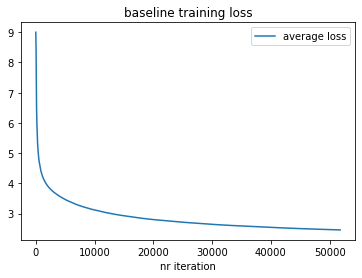

In [15]:
#plot baseline loss

baseline_chkpt = torch.load('checkpoints/baseline_3.pth.tar', map_location=str(device))
baseline_losses = avg_losses(baseline_chkpt['metrics']['epoch_losses'])

create_losses_plot('baseline training loss',baseline_losses)


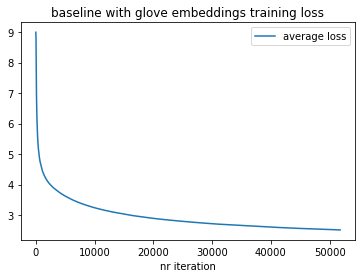

In [14]:
#plot baseline with glove embeddings loss
glove_baseline_chkpt = torch.load('checkpoints/glove_baseline_3.pth.tar', map_location=str(device))
glove_baseline_losses = avg_losses(glove_baseline_chkpt['metrics']['epoch_losses'])

create_losses_plot('baseline with glove embeddings training loss',glove_baseline_losses)

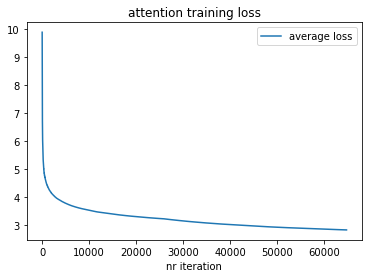

In [13]:
#plot attention loss
basic_att_chkpt = torch.load('checkpoints/basic_att_3.pth.tar', map_location=str(device))
basic_att_losses = avg_losses(basic_att_chkpt['metrics']['epoch_losses'])

create_losses_plot('attention training loss',basic_att_losses)

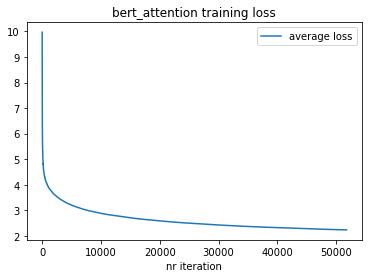

In [8]:
#plot attention with bert embeddings loss

bert_chkpt = torch.load('checkpoints/bert_attention_3.pth.tar', map_location=str(device))
bert_losses = avg_losses(bert_chkpt['metrics']['epoch_losses'])

create_losses_plot('bert_attention training loss',bert_losses)


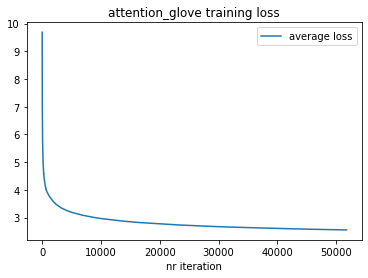

In [10]:
#plot attention with glove embeddings loss

glove_att_chkpt = torch.load('checkpoints/glove_att_3.pth.tar', map_location=str(device))
glove_att_losses = avg_losses(glove_att_chkpt['metrics']['epoch_losses'])

create_losses_plot('attention_glove training loss',glove_att_losses)



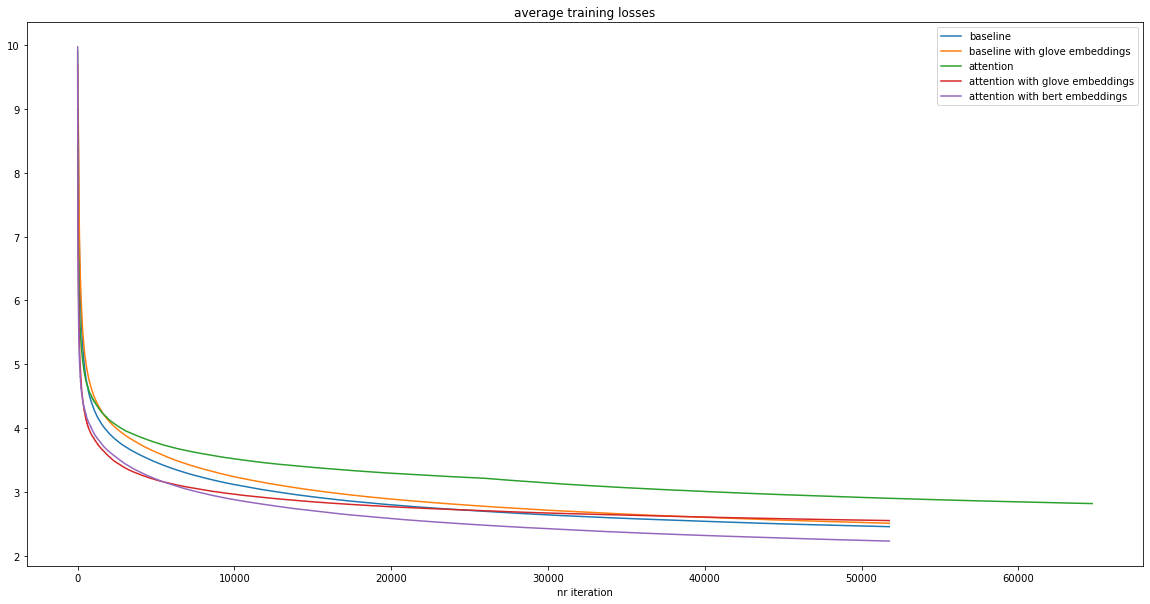

In [12]:
#plot all losses in one figure
plt.figure(figsize=(20,10))
plt.plot(baseline_losses, label='baseline')
plt.plot(glove_baseline_losses, label='baseline with glove embeddings')
plt.plot(basic_att_losses, label='attention')
plt.plot(glove_att_losses, label='attention with glove embeddings')
plt.plot(bert_losses, label='attention with bert embeddings')


        
plt.xlabel("nr iteration")
plt.legend(loc='upper right')
plt.title('average training losses')
        
plt.show()

